# 14. 연관 규칙과 협업필터링

In [11]:
pip install surprise

Note: you may need to restart the kernel to use updated packages.


In [12]:
from pathlib import Path

import heapq
from collections import defaultdict

import pandas as pd
import matplotlib.pylab as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import train_test_split

import dmba

%matplotlib inline

## 연관 규칙과 협업필터링
### 연관 규칙과 협업필터링은 거래 데이터베이스에서 구매된 아이템들 간의 연관성을 추론하기 위한 비지도 방법

### 연관 규칙
* '무엇이 무엇과 잘 어울리는지'를 밝혀내는 것
* 서로 다른 아이템의 구매 간 의존성을 결정하기 위해 고객의 거래 데이터베이스를 분석하는 데에서 비롯되었기 때문에 장바구니 분석이라고도 불림
* 같이 구매되는 아이템들을 학습하기 위해 소매 분야에서 많이 사용

### 협업 필터링
* 목적은 사용자 수준의 정보를 활용하여 개인화된 추천을 제공하는 것

## 연관 규칙
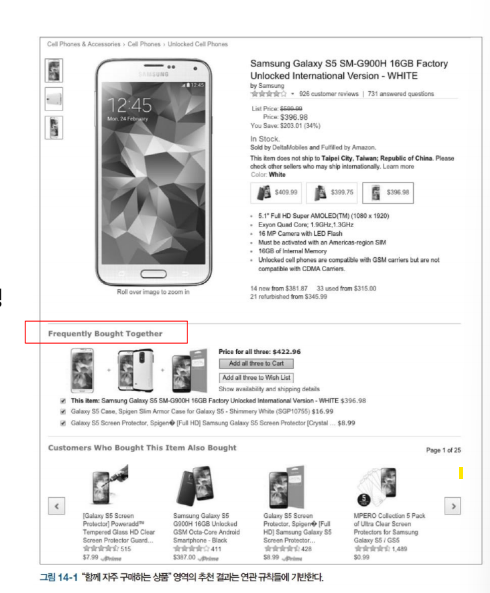

### 연관 규칙 사용 예
* 온라인 추천 시스템

### 연관 규칙 생성 과정
* 후보 규칙 생성
    * 반발 아이템셋에 근거한 후보 규칙들의 집합 생성
    * 가장 널리 사용되는 규칙-생성 알고리즘은 Apriori
* 강한 규칙 선택
    * 후보 규칙들로부터 아이템들 사이에 가장 강한 연관성을 보여주는 규칙 선택

## 예제 1: 휴대폰 케이스 구매에 대한 가상 데이터
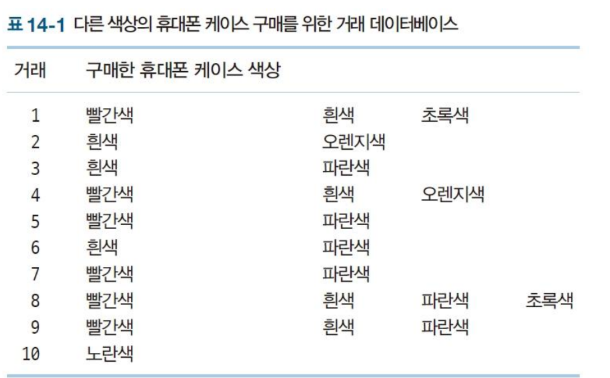

## 후보 규칙 생성
### 후보 규칙
* 연관 규칙의 첫 단계로 아이템들 간의 연관성을 표시하는 후보가 될 수 있는 모든 규칙을 생성하는 것
* 아이템들 간에 가능한 모든 규칙을 if-then문 형식으로 열거한 후 실질적인 의존성을 가장 잘 표현하는 규칙들만 선택하는 것
* if부분은 조건부, then부분은 결론부
* 연관분석에서 조건부와 결론부는 공통 아이템을 갖지 않는 아이템의 집합(아이템셋)
* 모든 아이템의 조합을 찾는 것은 p에 따라 지수적으로 증가하는 긴 계산이 소요되므로(p: 아이템 수), **데이터베이스 내에서 상대적으로 빈도수가 높은 조합(빈발 아이템셋)만 고려(현실적인 해결책)**
* 빈발 아이템셋은 사용자의 결정에 의해 선택된 최소 지지도(support)를 초과하는 지지도를 갖는 아이템셋으로 구성

## 후보 규칙 생성과 지지도 예
### 후보 규칙 생성
* if 빨간색, then 흰색
    * 빨간색 케이스를 구매하면 흰색도 구매한다는 의미
    * 조건부는 빨간색이고 결론부는 흰색
* if 빨간색 and 흰색, then 초록색
    * 조건부는 아이템셋{빨간색, 흰색}이고, 결론부는 {초록색}

### 후보 규칙 지지도(support)
* 아이템셋{빨간색, 흰색}의 지지도는 4(또는 100\*4/10=40%)
### Apriori알고리즘은 가장 널리 사용되는 규칙-생성 알고리즘

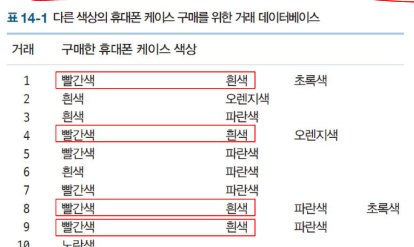

## 강한 규칙 선택
### 후보 규칙들로부터 아이템들 사이에 가장 강한 연관성을 보여주는 규칙 선택
### 규칙의 불확실성을 평가하기 위해 지지도와 신뢰도 사용
### 사용자는 규칙 생성과 선택 과정에서 사용되는 최소 지지도와 신뢰도 값 명시
### 신뢰도(confidence)
$$신뢰도=\frac{조건부와 결론부의 모든 아이템셋이 포함된 거래 수}{조건부 아이템셋이 포함된 거래 수}$$
* 데이터베이스 내의 조건부와 결론부에 동시에 존재하는 아이템셋과 조건부에 존재하는 아이템셋을 비교해 조건부와 결론부의 모든 아이템셋이 포함된 거래 수(지지도)와 조건부의 모든 아이템셋이 포함된 거래 수의 비율로 정의
    * 예: 슈퍼마켓 데이터베이스에 100000개의 매장 거래기록이 존재
        * 오렌지쥬스와 (처방전 없는)감가약이 함께 있는 거래가 2000개
        * 여기에 수프가 포함된 거래가 800개
        * "if 오렌지주스와 감기약이 판매되면 then 같은 거래에서 수프도 판매된다" 는 연관규칙은 지지도가 800거래(다시말해, 0.8%=800/100000), 신뢰도는 40%(800/2000)이 됨

### 지지도와 신뢰도
* 지지도는 데이터베이스에서 임의로 선택된 거래가 조건부와 결론부의 모든 아이템을 포함할(추정된) 확률
$$지지도=\hat{P}(조건부 AND 결론부)$$
* 신뢰도는 임의로 선택된 거래가 조건부의 모든 아이템을 포함한다고 할 때 결론부의 모든 아이템도 포함할(추정된)조건부 확률
* 조건부나 결론부의 지지도가 크다면 조건부아 결론부가 상호 독립적일 때라도 신뢰도가 커질 수 있기 때문에 종종 의심스러운 상황이 발생
$$신뢰도=\frac{\hat{P}(조건부 AND 결론부)}{\hat{P}(조건부)}=\hat{P}(결론부|조건부)$$

## 향상비(lift ratio)
* 신뢰도와 기준 신뢰도의 비율
    * 기준값은 거래 내의 결론부 아이템셋이 각 규칙의 조건부와 독립적이라고 가정하여 얻은 것

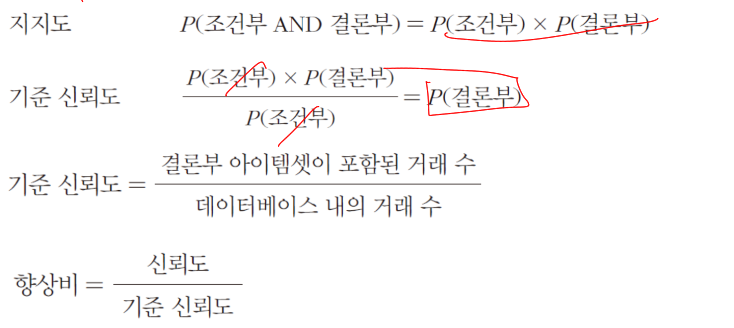

## 강항 규칙 선택(기타 측정 항목)
### 레버리지(leverage)
* 독립성 편차를 측정하는 데 사용
    * 결과값은 -1에서 1까지이며, 조건부와 결론부가 서로 독립이면 0이됨
    * 해당 아이템들이 서로 독립인 거래에 비해 얼마나 더 빈번히 동시 구매되는지를 나타냄

    $$레버리지=P(조건부 AND 결론부)-P(조건부)\times P(결론부)$$

### 확신도
* 신뢰도와 비슷하며 값의 범위는 0부터 $\infty$까지
    * 만약, 조건부와 결론부가 서로 독립이면, 확신도는 1
    * 만일 규칙이 항상 유지된다면(해당 아이템들이 항상 동시에 등장하면), 확신도 값은 무한이 됨

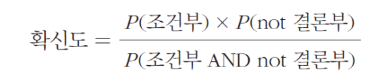

## 데이터 형식
### 거래 데이터 형식
* 데이터베이스에서 최소 2의 지지 계수(지지도로 따지면 2/10=20%)를 갖는 연관규칙을 찾으려 한다고 가정
* 즉, 적어도 20% 이상에서 함께 구매된 아이템에 근거한 규칙들을 찾고자 함

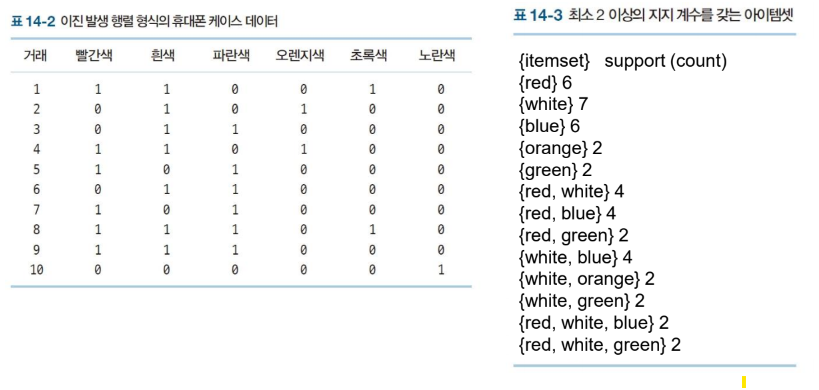

## 규칙 선택 과정
### 1단계
* 요구되는 지지도를 갖는 아이템셋인 '빈발'아이템셋을 모두 찾음
### 2단계
* 빈발 아이템셋에서 신뢰도 요구 조건에 맞는 연관 규칙 생성

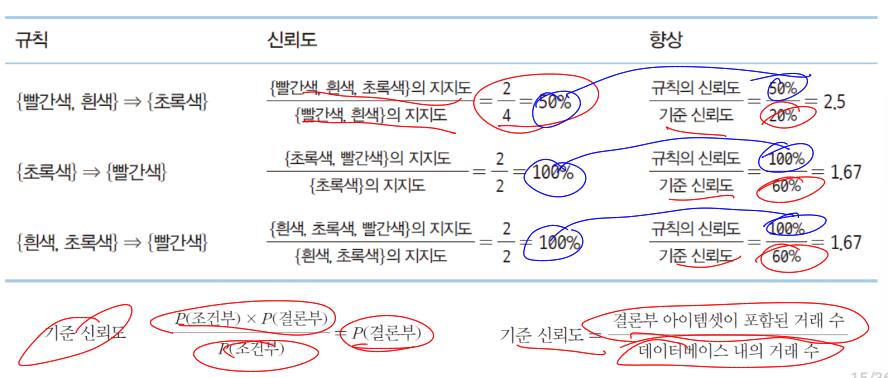

In [13]:
# Load and preprocess data set
fp_df = dmba.load_data('Faceplate.csv')
fp_df.set_index('Transaction', inplace=True)
fp_df

,Red,White,Blue,Orange,Green,Yellow
Transaction,,,,,,
1,1,1,0,0,1,0
2,0,1,0,1,0,0
3,0,1,1,0,0,0
4,1,1,0,1,0,0
5,1,0,1,0,0,0
6,0,1,1,0,0,0
7,1,0,1,0,0,0
8,1,1,1,0,1,0
9,1,1,1,0,0,0


### 규칙과 우연
* 보다 많은 레코드에 기반한 규칙일수록 결론이 좀 더 강건
* 더 명확한 규칙들을 세밀하게 고려할수록, 적어도 일부는 우연한 표본 추출 결과에 근거할 가능성이 더 높음

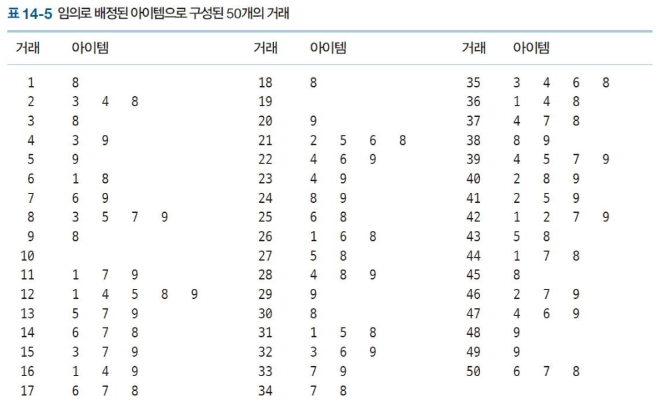

In [14]:
# create frequent itemsets
itemsets = apriori(fp_df, min_support=0.2, use_colnames=True)

# and convert into rules
rules = association_rules(itemsets, metric='confidence', min_threshold=0.5, num_itemsets=0)
rules.sort_values(by=['lift'], ascending=False).head(6)

print(rules.sort_values(by=['lift'], ascending=False)
      .drop(columns=['antecedent support', 'consequent support', 'conviction', 'zhangs_metric'])
      .head(6))

       antecedents   consequents  support  confidence      lift  \
12    (White, Red)       (Green)      0.2         0.5  2.500000   
15         (Green)  (White, Red)      0.2         1.0  2.500000   
4          (Green)         (Red)      0.2         1.0  1.666667   
13  (White, Green)         (Red)      0.2         1.0  1.666667   
7         (Orange)       (White)      0.2         1.0  1.428571   
8          (Green)       (White)      0.2         1.0  1.428571   

    representativity  leverage   jaccard  certainty  kulczynski  
12               1.0      0.12  0.500000      0.375    0.750000  
15               1.0      0.12  0.500000      1.000    0.750000  
4                1.0      0.08  0.333333      1.000    0.666667  
13               1.0      0.08  0.333333      1.000    0.666667  
7                1.0      0.06  0.285714      1.000    0.642857  
8                1.0      0.06  0.285714      1.000    0.642857  


c:\Users\sdh05\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


## 예제 2: 유사한 서적 구매를 위한 규칙들
### 찰스 북클럽의 사례(21장)
* 4000개의 거래, 11개의 서로 다른 유형의 서적
* 예) 첫 번째 거래: YouthBks(청소년 서적), DoltYBks(do-it-yourself서적), GeogBks(지리학 서적)
* 최소지지도 5%(4000거래 중에서 200거래), 최소 신뢰도를 50%로 명시, 81개 규칙 생성

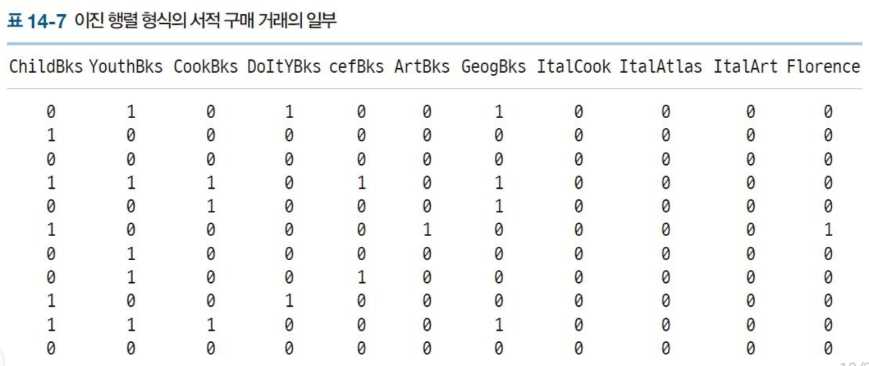

In [15]:
# load dataset
all_books_df = dmba.load_data('CharlesBookClub.csv')

# create the binary incidence matrix
ignore = ['Seq#', 'ID#', 'Gender', 'M', 'R', 'F', 'FirstPurch', 'Related Purchase',
          'Mcode', 'Rcode', 'Fcode', 'Yes_Florence', 'No_Florence']
count_books = all_books_df.drop(columns=ignore)
count_books[count_books > 0] = 1

#create frequent itemsets and rules
itemsets=apriori(count_books, min_support=200/4000, use_colnames=True)
rules=association_rules(itemsets, metric='confidence', min_threshold=0.5, num_itemsets=0)

#Display 25 rules with highest lift
rules.sort_values(by=['lift'], ascending=False).head(25)

c:\Users\sdh05\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
64,"(YouthBks, RefBks)","(CookBks, ChildBks)",0.08125,0.24200,0.05525,0.680000,2.809917,1.0,0.035588,2.368750,0.701080,0.206157,0.577836,0.454153
73,"(DoItYBks, RefBks)","(CookBks, ChildBks)",0.09250,0.24200,0.06125,0.662162,2.736207,1.0,0.038865,2.243680,0.699207,0.224154,0.554304,0.457631
60,"(YouthBks, DoItYBks)","(CookBks, ChildBks)",0.10325,0.24200,0.06700,0.648910,2.681448,1.0,0.042014,2.158993,0.699266,0.240791,0.536821,0.462885
80,"(GeogBks, RefBks)","(CookBks, ChildBks)",0.08175,0.24200,0.05025,0.614679,2.539995,1.0,0.030467,1.967190,0.660276,0.183729,0.491661,0.411162
69,"(YouthBks, GeogBks)","(CookBks, ChildBks)",0.10450,0.24200,0.06325,0.605263,2.501087,1.0,0.037961,1.920267,0.670211,0.223301,0.479239,0.433313
77,"(GeogBks, DoItYBks)","(CookBks, ChildBks)",0.10100,0.24200,0.06050,0.599010,2.475248,1.0,0.036058,1.890321,0.662959,0.214159,0.470989,0.424505
67,"(CookBks, GeogBks, ChildBks)",(YouthBks),0.10950,0.23825,0.06325,0.577626,2.424452,1.0,0.037162,1.803495,0.659782,0.222320,0.445521,0.421552
71,"(CookBks, ChildBks, RefBks)",(DoItYBks),0.10350,0.25475,0.06125,0.591787,2.323013,1.0,0.034883,1.825642,0.635276,0.206229,0.452247,0.416110
49,"(GeogBks, DoItYBks)",(YouthBks),0.10100,0.23825,0.05450,0.539604,2.264864,1.0,0.030437,1.654554,0.621215,0.191396,0.395607,0.384178
62,"(CookBks, ChildBks, RefBks)",(YouthBks),0.10350,0.23825,0.05525,0.533816,2.240573,1.0,0.030591,1.634013,0.617608,0.192845,0.388010,0.382858


## 협업 필터링
### 온라인 추천 시스템에서 많이 활용되는 기법
* 온라인 기업이 단순 브라우저들을 고객으로 전환하고, 교차판매를 늘리고, 충성도를 높이는 데 도움이 됨
### 항목을 구매하거나 높은 평가 점수를 매기는 등 한 항목에 대해 비슷한 행동을 취한 사용자들로부터 형성된 항목 간의 관계에 기반을 둠
### 사용자 기반 협업 필터링은 항목-사용자 조합의 데이터를 활용하여 사용자 간 유사도를 계산하고 이를 통해 각 사용자에게 맞춤형 추천 제공
### 효과적으로 협업 필터링을 하기 위한 중요한 요소
* 추천에 대해 사용자들에게서 피드백을 받는다는 점
* 사용자들이 각 항목에 대해 충분한 정보를 가져야 한다는 점

## 데이터 유형과 형식
* 협업 필터링은 항목-사용자 조합에서 그 항목에 대한 사용자의 선호도를 측정하는 측도 필요
* 선호도는 점수화된 평가 또는 구매, '좋아요' 또는 클리고가 같은 이진 동작이 될 수 있음
* n명의 사용자(u1, u2,..., un)와 p개의 항목(i1, i2, ..., ip)에 대한 데이터는 행(사용자), 열(항목)로 구성된 n\*p 행렬

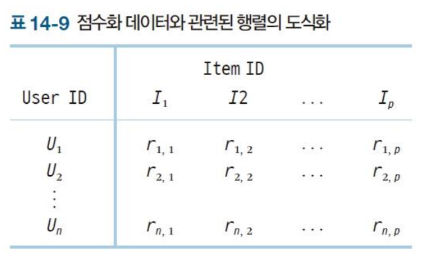

## 예제3. 넷플릭스의 상금 경연 대회
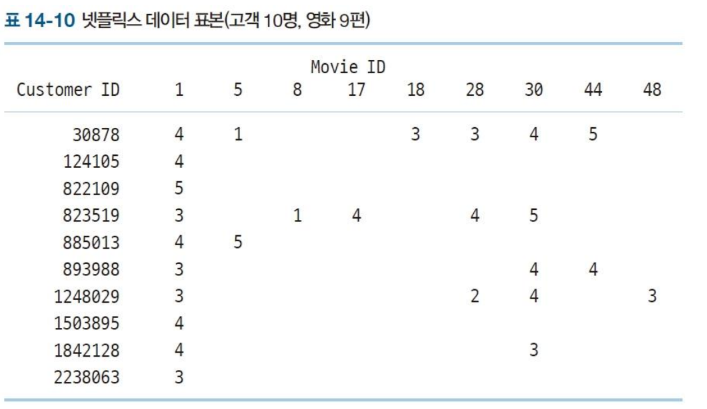

## 사용자 기반 협업 필터링: 사람들은 너를 좋아해
* 알고리즘 구성 단계
    1. 관심 대상의 사용자와 가장 비슷한 사용자(이웃)을 찾는다. 이를 위해 사용자의 선호와 다른 사용자들의 선호를 비교한다.
        * 사용자와 다른 사용자들 간의 거리를 측정
    2. 사용자가 아직 구매하지 않은 항목들만 고려하고, 그 사용자의 이웃들이 가장 선호하는 것을 추천한다.
        * 사용자기반 최위선 N 추천: 한계점을 거리 혹은 필요 이웃들의 개수에 적용
* 거리 측정 측도: 피어슨 상관계수
    * k-NN에서 사용한 유클리드 거리는 협업필터링에 적용했을 때 성능이 좋지 못함

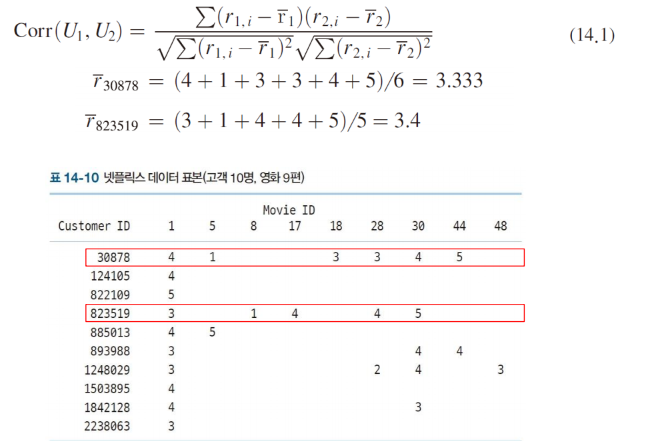

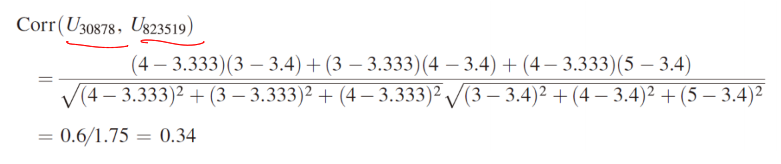

* 거리측정측도: cosine 유사도
    * 사이각이 0에 근접할수록 두 벡터의 거리가 근접

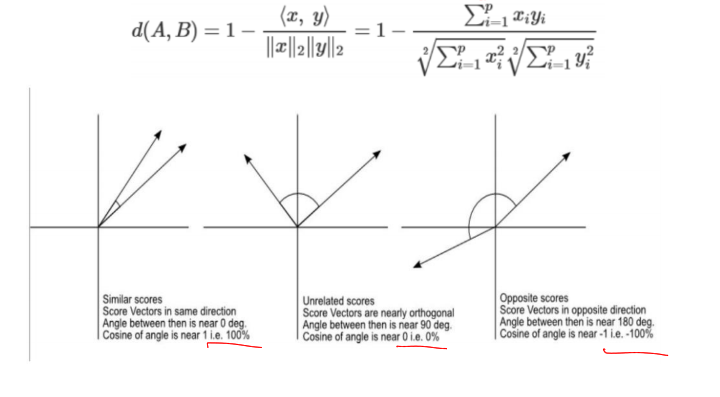

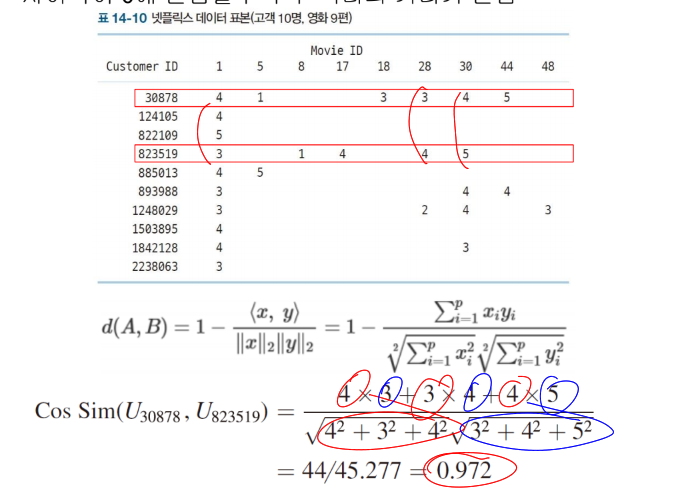

## 항목 기반 협업 필터링
1. (임의의 사용자가)관심을 가지는 항목과 공동으로 평가 혹은 구매한 항목들을 찾는다.
2. 비슷한 항목들 중에서 가장 대중적이거나 상관관계가 높은 항목을 추천한다.

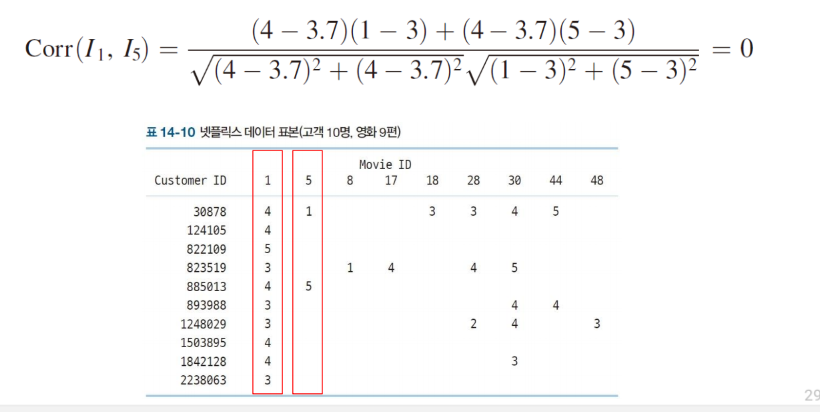

In [16]:
import random

random.seed(0)
nratings = 5000
randomData = pd.DataFrame({
    'itemID': [random.randint(0,99) for _ in range(nratings)],
    'userID': [random.randint(0,999) for _ in range(nratings)],
    'rating': [random.randint(1,5) for _ in range(nratings)],
})

def get_top_n(predictions, n=10):
    # First map the predictions to each user.
    byUser = defaultdict(list)
    for p in predictions:
        byUser[p.uid].append(p)

    # For each user, reduce predictions to top-n
    for uid, userPredictions in byUser.items():
        byUser[uid] = heapq.nlargest(n, userPredictions, key=lambda p: p.est)
    return byUser

# Convert thes data set into the format required by the surprise package
# The columns must correspond to user id, item id and ratings (in that order)
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(randomData[['userID', 'itemID', 'rating']], reader)

# Split into training and test set
trainset, testset = train_test_split(data, test_size=.25, random_state=1)

## User-based filtering
# compute cosine similarity between users
sim_options = {'name': 'cosine', 'user_based': True}
algo = KNNBasic(sim_options=sim_options)
algo.fit(trainset)

# Than predict ratings for all pairs (u, i) that are NOT in the training set.
predictions = algo.test(testset)

top_n = get_top_n(predictions, n=4)

# Print the recommended items for each user
print()
print('Top-4 recommended items for each user')
for uid, user_ratings in list(top_n.items())[:5]:
    print('User {}'.format(uid))
    for prediction in user_ratings:
        print('  Item {0.iid} ({0.est:.2f})'.format(prediction), end='')
    print()
print()


## Item-based filtering
# compute cosine similarity between users
sim_options = {'name': 'cosine', 'user_based': False}
algo = KNNBasic(sim_options=sim_options)
algo.fit(trainset)

# Than predict ratings for all pairs (u, i) that are NOT in the training set.
predictions = algo.test(testset)
top_n = get_top_n(predictions, n=4)

# Print the recommended items for each user
print()
print('Top-4 recommended items for each user')
for uid, user_ratings in list(top_n.items())[:5]:
    print('User {}'.format(uid))
    for prediction in user_ratings:
        print('  Item {0.iid} ({0.est:.2f})'.format(prediction), end='')
    print()

Computing the cosine similarity matrix...
Done computing similarity matrix.

Top-4 recommended items for each user
User 6
  Item 6 (5.00)  Item 77 (2.50)  Item 60 (1.00)
User 222
  Item 77 (3.50)  Item 75 (2.78)
User 424
  Item 14 (3.50)  Item 45 (3.10)  Item 54 (2.34)
User 87
  Item 27 (3.00)  Item 54 (3.00)  Item 82 (3.00)  Item 32 (1.00)
User 121
  Item 98 (3.48)  Item 32 (2.83)

Computing the cosine similarity matrix...
Done computing similarity matrix.

Top-4 recommended items for each user
User 6
  Item 77 (3.00)  Item 60 (3.00)  Item 6 (3.00)
User 222
  Item 77 (2.24)  Item 75 (2.00)
User 424
  Item 54 (3.47)  Item 14 (3.44)  Item 45 (3.00)
User 87
  Item 27 (3.00)  Item 32 (3.00)  Item 82 (3.00)  Item 54 (2.50)
User 121
  Item 32 (3.06)  Item 98 (2.31)


In [17]:
## Build a model using the full dataset
trainset = data.build_full_trainset()
sim_options = {'name': 'cosine', 'user_based': False}
algo = KNNBasic(sim_options=sim_options)
algo.fit(trainset)

# Predict rating for user 383 and item 7
algo.predict(383, 7)

Computing the cosine similarity matrix...
Done computing similarity matrix.


Prediction(uid=383, iid=7, r_ui=None, est=2.3661840936304324, details={'actual_k': 4, 'was_impossible': False})

## 연관 규칙 VS협업 필터링
### 빈발 항목집합 vs 개인 맞춤형 추천
* 연관 규칙은 빈발 항목의 조합을 찾으며 찾은 항목들에 대해서만 추천 제공
* 반면, 협업 필터링은 모든 항목에 대해 개인 맞춤형 추천을 제공하여 특이한 선호도를 갖는 사용자들에게도 맞춤 서비스 제공

### 거래 데이터 vs 사용자 데이터
* 연관 규칙은 여러 거래/장바구니 안에 있는 다른 항목과의 공동 구매 내역을 기반으로 추천
* 협업 필터링은 적을 수도 있는 다른 사용자와의 공동 구매 내역 혹은 같은 평가 점수를 바탕으로 추천

### 이진 데이터 및 평가 점수 데이터
* 연관 규칙은 각 항목을 이진 데이터(1=구매, 0=비구매)로 처리
* 협업 필터링은 이진 데이터 및 수치화된 평가 점수 데이터를 모두 활용

### 2개 이상의 항목
* 연관 규칙에서는 조건부와 결론부 모두 1개 이상의 항목을 포함하여(예, if 우유, then 쿠키와 시리얼) 하나의 추천은 여러 항목으로 이루어진 하나의 묶음일 수도 있음(예: 우유, 쿠키, 시리얼 모두 구입 시 10% 할인 혜택)
* 협업 필터링에서는 두 항목 혹은 두 사용자 간의 유사도를 측정하여 추천은 단일 항목이나 각 항목 간에 전혀 관련이 없을 수도 있는 여러 단일 항목으로 구성

## 연관 규칙과 협업 필터링 단점
* 연관 규칙 단점: 생성되는 규칙이 너무 많다
* 협업 필터링의 단점: 새로운 사용자 혹은 항목들에 대해 추천을 생성할 수 없다.